# Business Understanding/Бизнес-анализ
## Determine Business Objectives/ Определение бизнес-целей

Не возможно установить. Придумаем задачу.
Допустим по закону на вине должна стоять маркировка качества вина от 0 до 10 и мы не хотим тратить ресурсы на дегустацию.  
Бизнес-цель: Дать инструмент, который определит качество вина по физ-хим свойствам.  
Критерий успеха: в течение как минимум двух лет дегустацию можно будет проводить реже или вообще не проводить. За счет этого мы должны сэкономить денег больше, чем потратили на разработку модели. Например, будем проводить дегустацию только тех партий, для которых по физ-хим показателям получаем ненадежные результаты (вероятность принадлежности к классу от 50 до 70 процентов.)

## Assess Situation/ Оценка текущей ситуации
Предположим, пока используется дегустация. Модели нет, но физ-хим данные уже и так собираются.   
Инвентаризация ресурсов - не будем выдумывать.  
Сбор требований - тут может быть формат результата - web-сервис или standalone-приложение на python. Требования формата ограничения может быть: не распространять код, использовать только совободное ПО. Требования к интерфейсу ПО тоже тут. Возможно, потребуется автоматизация ввода данных - API со стороны ПО. Но, скорее всего, API второстепенно и на время эксперимента можно оставить задачу ввода за аналитиками из команды.  
Риски - уже есть такой инструмент и разработка не нужна - нужно искать что-то похожее. Также основные: изменение требований, проблемы с данными, плохие вероятности работы модели.  
Анализ выгод и затрат - нужно считать затраты на дегустацию/без нее, затраты на проект.  



## Determine Data Mining Goals/ Определение целей аналитики
Цель DS: Обучить, задеплоить и контролировать качество модели, которая будет определять качество вина. 

## ProduktProject Plan/ Подготовка плана проекта

|фаза|время|ресурсы|риски|комментарий|
|--|--|--|--|--|
|Business Understanding|2 недели|Аналитики|Изменение требований|долго - много интервью|
|Data Understanding|2 недели|Аналитики|Проблемы с данными, технологиями|могут не подходить стандартные модели, напимер, из-за малых данных|
|Data Preparation|2 недели|DS, DE|Проблемы с технологиями, данными|М.б. не выйдет создать хороших признаков с большой корреляцией|
|Modeling|2 недели| DS |Проблемы с технологией|Нет подходящих моделей - все с низкой вероятностью класса|
|Evaluation|1 неделя|Аналитики|Изменение требований, отсутствие хороших предсказаний|На реальных данных, например, сильно изменились физ-хим показатели и класс предсказывается плохо.|
|Deployment|2 недели|Разработчик, DS|Изменение требований, отсутствие результата|Заказчик, например, забыл, что какой-то показатель он не может измерить. Интерфейс не удобный.|

# DataUnderstanding/ Анализ данных

## Collect Initial Data/ Сбор данных 
Скачали данные с kaggle.


## Describe Data/ Описание данных 
Посмотрели описание на kaggle + ниже.

In [8]:
import numpy as np
import pandas as pd
df = pd.read_csv('winequalityN.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

Действительно тут физ-хим показатели + тип (красное/белое)

Связанные данные: 
* кислотность (два вида + лимонная кислота) скорее всего важны именно вместе. Вероятоно, хорошо использовать их линейную комбинацию (например, сумму)
* также с кислотностью точно будет связан pH
* свободный и общий диоксид серы - тоже связаны скорее всего. Также можно использовать сумму в качестве признака


## Explore Data/ Изучение данных

Корреляции переменных см. ниже


<AxesSubplot:>

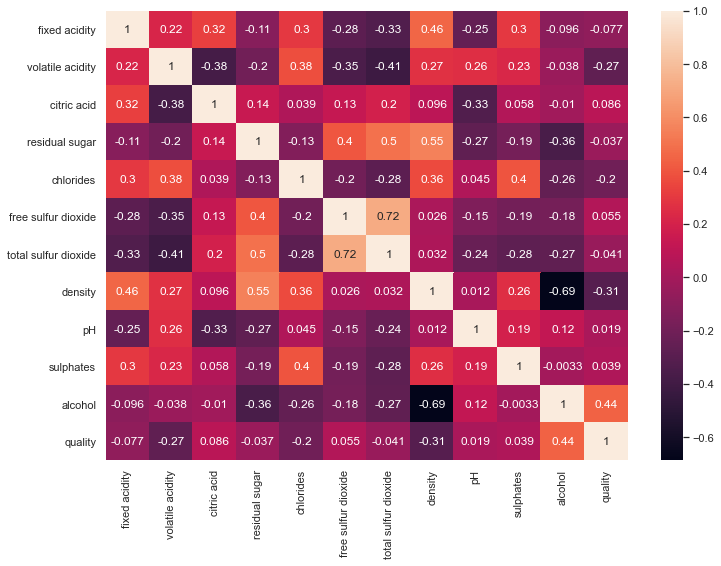

In [11]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Больше всего коррелируют с целевой переменной: алкоголь, переменная кислотность, хлориды, плотность.

Сами переменные сильно коррелированы, наверняка можно найти признаки производные от нескольких переменных, которые сокращают пространство признаков без сильной потери точности моделей.

## Verify Data Quality/ Проверка качества данных

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Есть пропуски в данных.
Нужно проверить на выбросы.

In [20]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["type_code"] = ord_enc.fit_transform(df[["type"]])
df[["type", "type_code"]].head(11)
df.drop('type', inplace=True, axis=1)


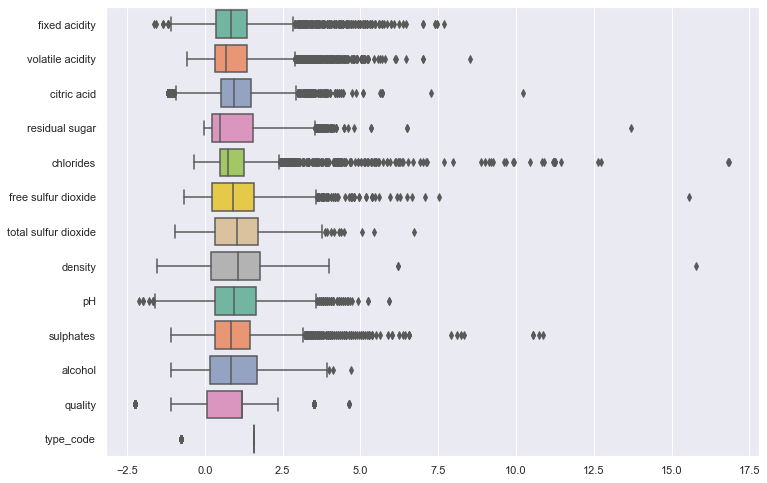

In [28]:
normalized_df=(df-df.mean())/df.std()
ax = sns.boxplot(data=normalized_df, orient="h", palette="Set2")

Из графиков видно, что данные распределены не по Гауссу, не симметрично: длинный хвост справа выходит за стандартное отклонение, при том что левый хвост почти не выходит.  
Большинство параметров нельзя считать распределенными нормально.

Выбросы редки, если подобрать для всех показателей подходящие распределения, можно качественно отсеять выбросы.

Группы замеров в сульфатах не похожи на выбросы. Это скорее какие-то особые классы. Их можно рассматривать (и сэмплировать) отдельно от остальных.

В целом данные не плохие.

# Data Preparation/Подготовка данных

## Select Data/ Выборка данных
Данных и так мало, оставим все.

## Clean Data/Очистка данных

Т.к. нет задачи получить качественный результат, просто удалим пустые данные, а выбросы чистить не будем вовсе.

In [29]:
df.dropna(axis=0, how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
 12  type_code             6463 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 706.9 KB


## Construct Data/ Генерация данных
Возможные подходы к генерации на основе изучения данных и проверки качества данных:
* общий показатель "кислотность"
* общий показатель "алкоголь+плотность"
* в общем, все коррелированные между собой показатели можно объединить - это будут хорошие новые признаки для модели

In [39]:
# linear regression feature importance
# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression
# from matplotlib import pyplot
# define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
normalized_df=(df-df.mean())/df.std()
X = normalized_df[[c for c in normalized_df.columns if c!='quality']]
y = normalized_df['quality'].astype('int')
# define the model


Feature: 0, Score: 0.60560 - fixed acidity
Feature: 1, Score: 0.84080 - volatile acidity
Feature: 2, Score: -0.20442 - citric acid
Feature: 3, Score: -0.15537 - residual sugar
Feature: 4, Score: 0.67914 - chlorides
Feature: 5, Score: 0.49103 - free sulfur dioxide
Feature: 6, Score: -0.10386 - total sulfur dioxide
Feature: 7, Score: 0.05051 - density
Feature: 8, Score: 0.27375 - pH
Feature: 9, Score: -0.42848 - sulphates
Feature: 10, Score: -0.54214 - alcohol
Feature: 11, Score: 0.74169 - type_code


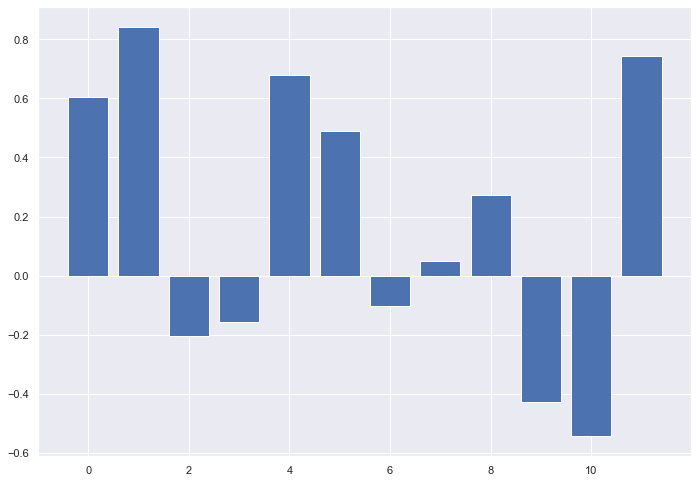

In [42]:
# # logistic regression for feature importance
# from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression(max_iter=1e3)
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f - %s' % (i,v, X.columns[i]))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Важность плотности и общего диоксида серы меньше чем остальных признаков, их можно убрать.

In [44]:
df.drop(labels=['total sulfur dioxide','density'],axis=1,inplace=True)

## Integrate Data / Интеграция данных

Что это такое?

## Format Data / Форматирование данных

Данные уже готовы для обучения - наборы X и y. Разбивка на выборки может разниться в зависимости от применяемой модели. Разобъем ниже по-простому.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling/Моделирование

## Select Modeling Techniques/Выбор алгоритмов 
Просто линейную регрессию возьмем.

## GenerateTestDesign/Подготовка плана тестирования
Интересна не просто точность модели, но и ее стабильность. По хорошему нужно что-то вроде ROC + AUC для нескольких категорий. Для простоты берем просто accuracy.

## BuildModel/ Обучение моделей
## AssessModel/ Оценка качества моделей

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1e3)
# fit the model
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.7710750193348801


# Evaluation/Оценка решения

## Evaluate Results/ Оценка результатов
Результат не плохой. Много идей появилось и не использовано. На первый взгляд модель применима к бизнесу.
## Review Process/ Оценка процесса
Очень мало времени и вводной информации. Из-за нехватки времени страдает и постановка задачи, и контроль результатов.  
Из-за нехватки информации страдает анализ применимости на практике.  
## Determine Next Steps/Определение следующих шагов
Увеличить реусрс (время и число людей), проработать идеи, полученные на этапе анализа данных, моделирования и других.

# Deployment/Внедрение 

## Plan Deployment/ Внедрение
Тут нужно кодить сервис или standalone-приложение
## Plan Monitoring and Maintenance/ Планирование мониторинга и поддержки
В зависимости от того, в каком виде будет использоваться ПО должна быть разная организация техподдержки. Нужно написать руководства пользователей.
## Produce Final Report/ Подготовка отчета
Показываем, что мы получили неплохой результа небольшими затратами.
## Review Project/ Ревью проекта
Показываем воображаемому заказчику ПО и отчет, получаем feedback. Может уже все готово и большая точность заказчику не нужна.